<!-- <p align="center">
    <h1 align="center">Redwine Prediction</h1>
  <br>
  <img src="img/redwine.jpg" />
</p> -->

<!-- ## Redwine Prediction -->
<h1 align="center">Redwine Prediction Quality</h1>

<!-- ![redwine_image](img/redwine.jpg) -->
<!-- ![caption](files/image.png) -->
<!-- <img src="img/redwine_3.jpg" width="300" height="300" style="width:300px;height:200px;" /> -->
<!-- ![redwine_image](../../images/redwine.jpg) -->
<!-- <img align="right"  src="../../images/redwine.jpg" /> -->
<!-- <img align="center"  src="../../images/redwine_3.jpg" style="width:500px;height:300px;margin-left:130px;" /> -->


<img align="left" src="img/redwine.jpg" width="300" height="400" />
<img align="right" src="img/redwine_3.jpg" width="300" height="400" />
<p align="center">
  <img width="300" height="400" src="img/redwine_2.jpg">
</p>

### This project determines the properties of redwine that makes it **good**

<!-- <img src="img/redwine.jpg" width="400" height="400" /> -->
<!-- ![redwine_image](img/redwine.jpg) -->

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

### Load dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

### Observing the data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

Dataset comprises of 1599 observations and 12 chracteriestics

In [5]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data has 11 float and 1 integer values

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Understanding Target variable

In [8]:
df.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

* Target variable/Dependent variable is discrete and categorical in nature.
* "quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
* 1,2 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 9.

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

* This tells us vote count of each quality score in descending order.
* "quality" has most values concentrated in the categories 5, 6 and 7.
* Only a few observations made for the categories 3 & 9

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

#### Check for missing values

<AxesSubplot:>

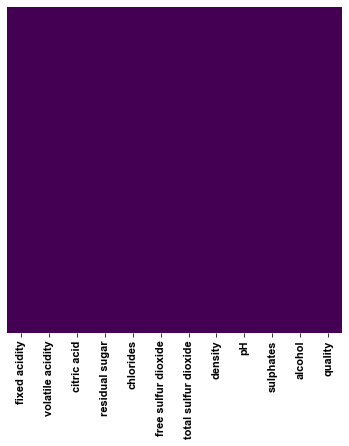

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

##### The above tells us there are no missing values

#### We need view quality distribution

We will use catplot to display out record

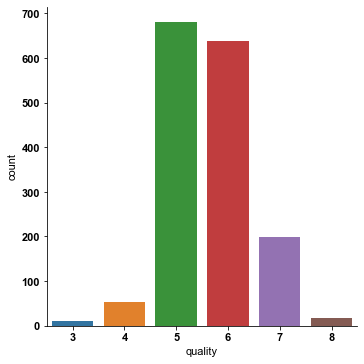

In [12]:
sns.catplot(x='quality',  kind='count', data=df)

#### The above gives us a pictorial view for the distribution of wine quality
##### The instruction given is that good wine has quality greater than 6.5

##### The below, queries the dataset to view wines with quality greater than 6.5

In [13]:
df.query('quality > 6.5')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


From the above we see that wine quality greater than 6.5 is 217

#### To determine other properties that make redwine good, we use the heatmap to determine the correlation

<AxesSubplot:>

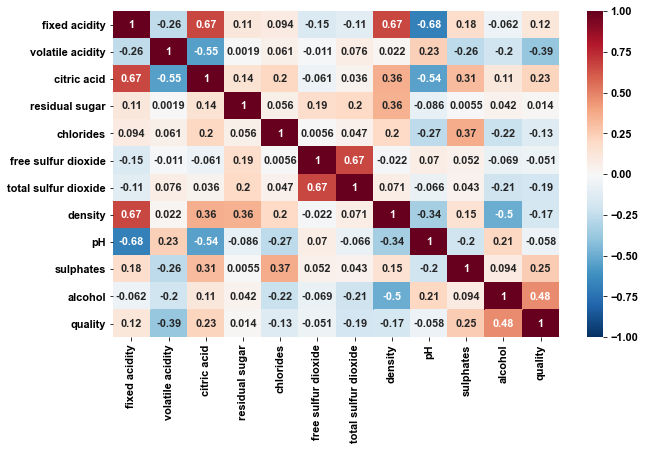

In [14]:
corr = df.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True,linewidths=0, vmin=-1, cmap="RdBu_r")

##### As show above and also from the heatmap, alcohol has a positive correlation to good wine.

### Further analysis between quality and other properties

In [15]:
def display_plots2(target_value, independent_variables, plot_type):
    fig, axes = plt.subplots(6,2,  figsize=(15,22))
    counter=0
    for i in range(6):
        for j in range(2):
            if counter == len(independent_variables):
                break
            y_value=independent_variables[counter]  
            if plot_type == 'barplot':
                sns.barplot(ax=axes[i,j], x=df[target_value], y=df[y_value])
            elif plot_type == 'boxplot':
                sns.boxplot(ax=axes[i,j], x=df[target_value], y=df[y_value])
            elif plot_type == 'scatter':
                sns.scatterplot(ax=axes[i,j], x=df[target_value], y=df[y_value])
                sns.scatterplot(x='alcohol', y='density', hue='quality', data=df)
            counter += 1
    plt.show()

In [16]:
def display_plots(target_value, y_value, plot_type):
    if plot_type == 'barplot':
        sns.barplot(x=target_value, y=y_value, data=df[[target_value, y_value]])
    elif plot_type == 'boxplot':
        sns.boxplot(ax=axes[i], x=target_value, y=y_value, data=df[[target_value, y_value]])
    plt.title(f'{target_value.capitalize()} VS {y_value.title()}')
    
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

#### Using Barplot

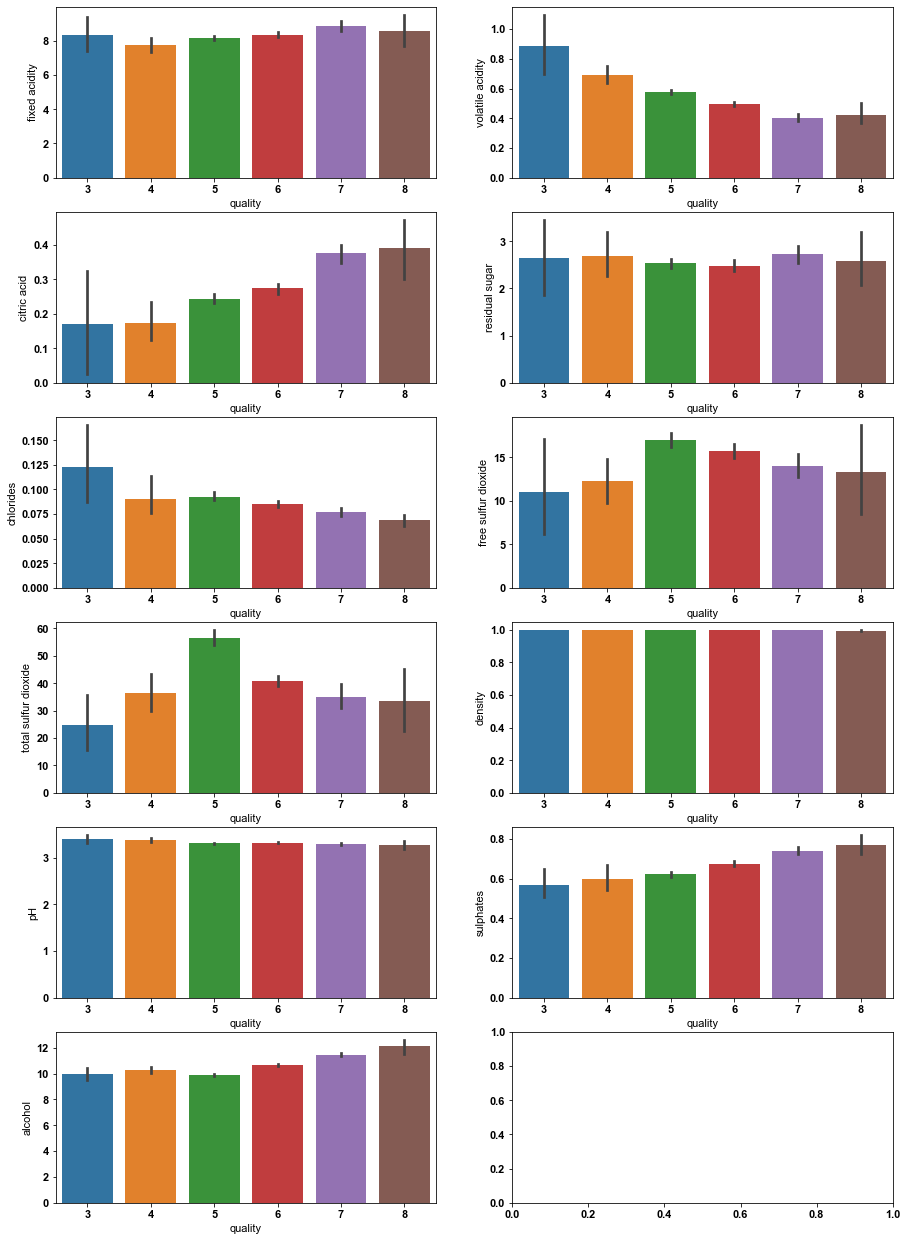

In [17]:
independent_variables = df.columns.values[:-1]
target = df.columns.values[-1]
plot_type='barplot'
independent_variables
display_plots2(target, independent_variables ,plot_type )

#### Using boxplot

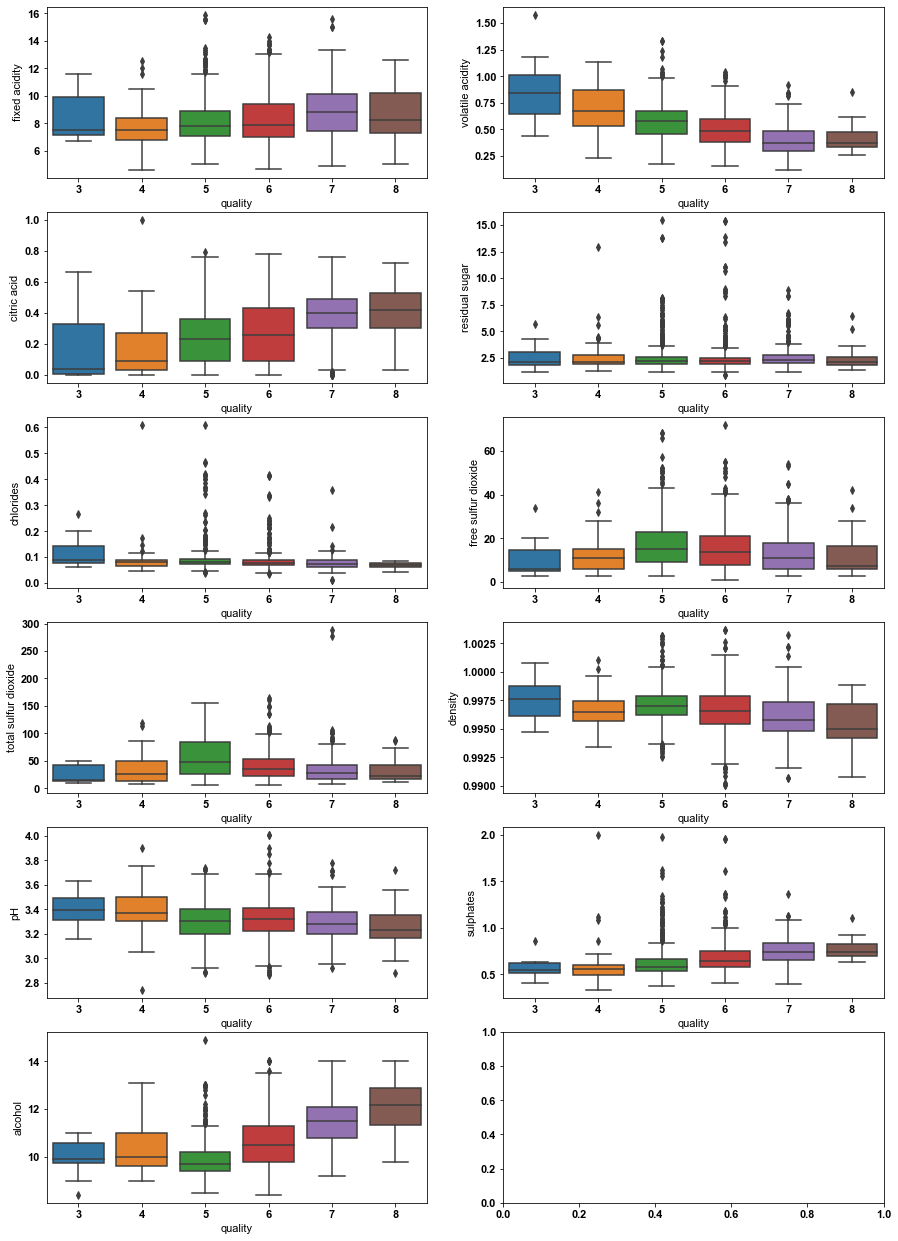

In [18]:
independent_variables = df.columns.values[:-1]
target = df.columns.values[-1]
plot_type='boxplot'
display_plots2(target, independent_variables,plot_type )

#### Scatter Plot

<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>

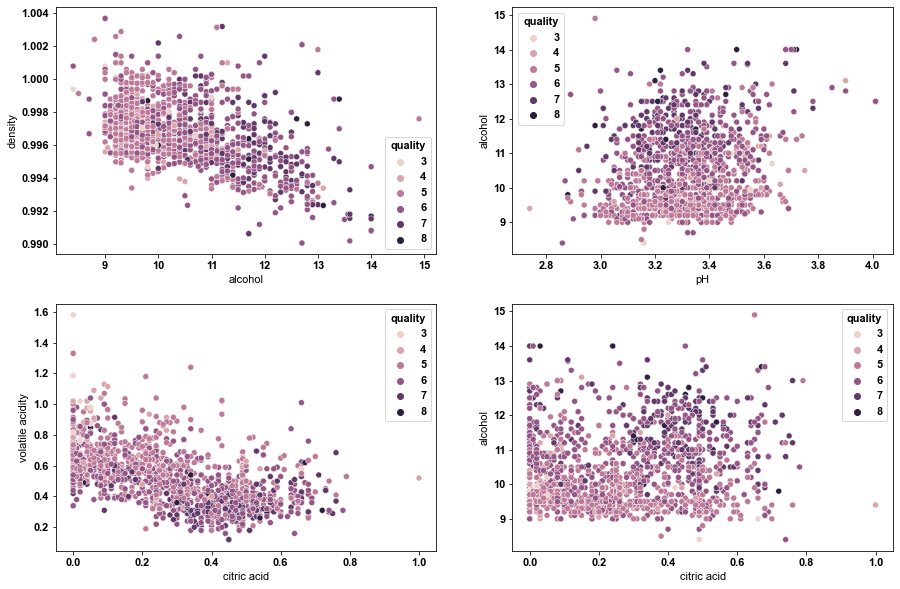

In [19]:
fig, axes = plt.subplots(2,2,  figsize=(15,10))
sns.scatterplot(ax=axes[0,0], x='alcohol', y='density', hue='quality', data=df)
sns.scatterplot(ax=axes[0,1], x='pH', y='alcohol', hue='quality', data=df)
sns.scatterplot(ax=axes[1,0], x='citric acid', y='volatile acidity', hue='quality', data=df)
sns.scatterplot(ax=axes[1,1], x='citric acid', y='alcohol', hue='quality', data=df)

The above shows that valatile acidity negatively affect good wine

# To check Outliers

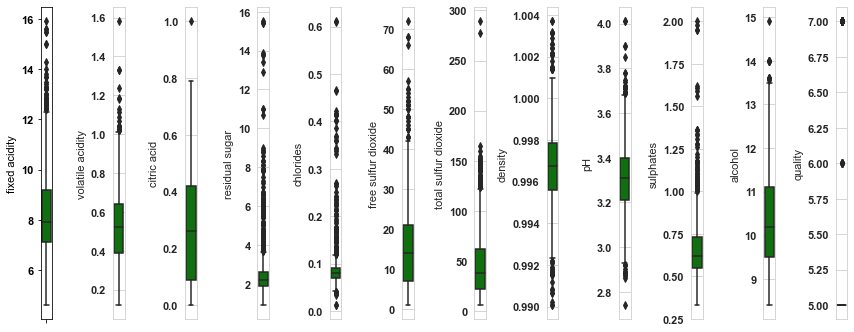

In [20]:
l = df.columns.values
number_of_columns=12
number_of_rows = int(len(l)-1/number_of_columns)
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data=df[l[i]] , y=df[l[i]] ,color='green',orient='v')
    plt.tight_layout()


From the above, we can see that **citric acid** and **alcohol** have very few outliers

# To check distribution-Skewness

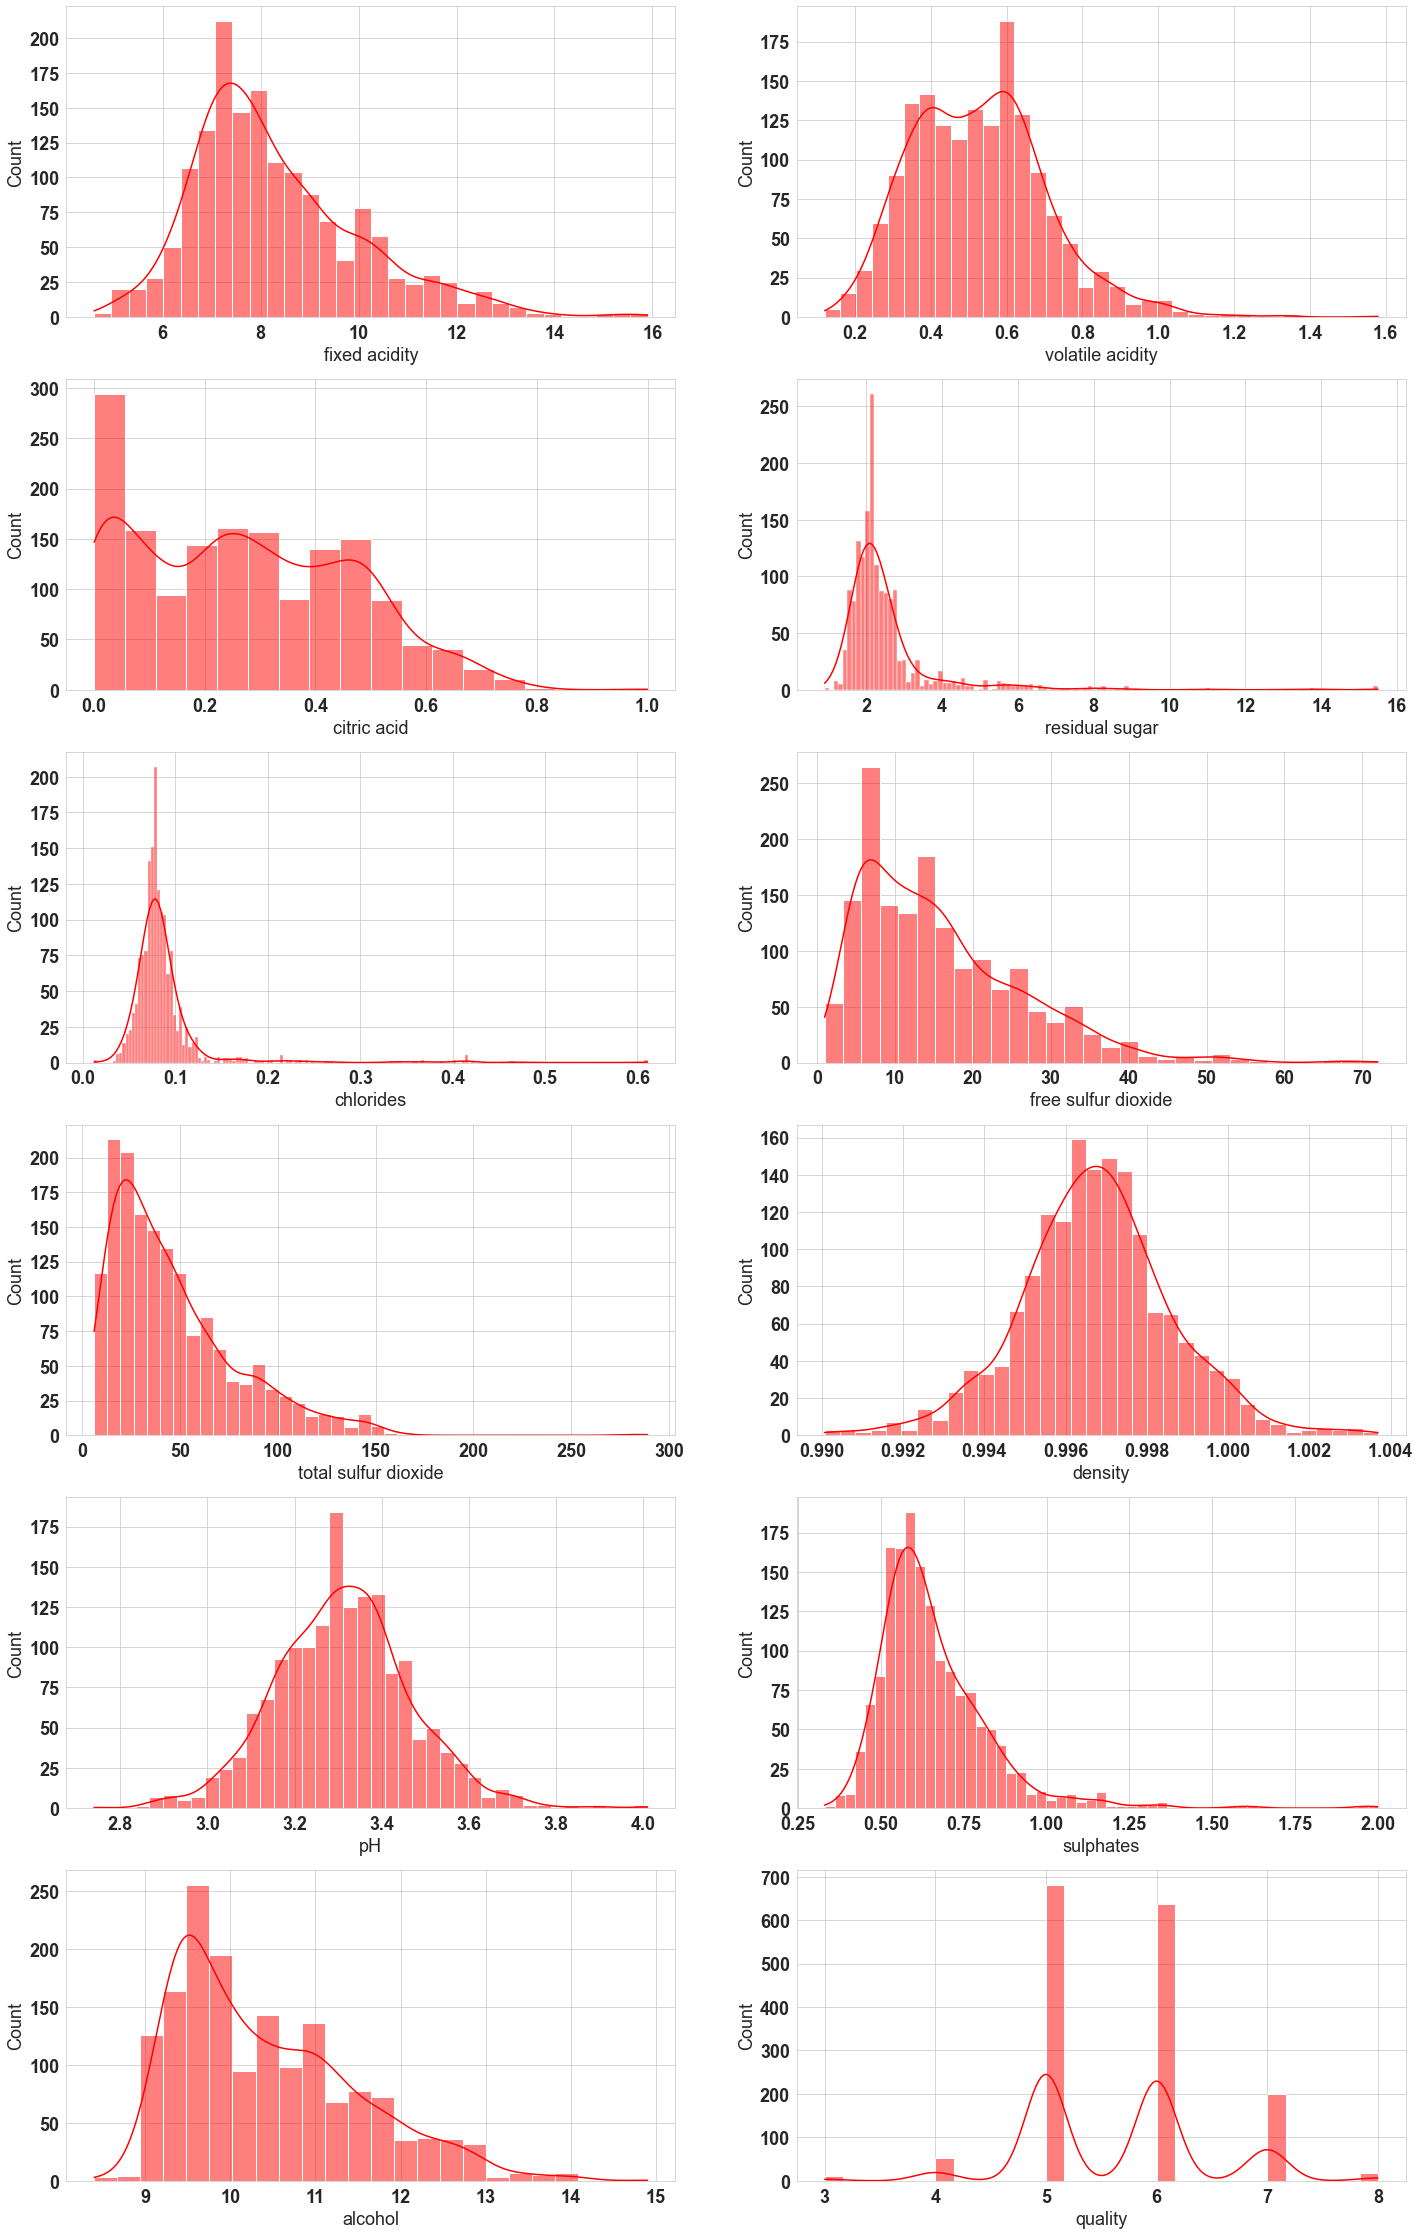

In [21]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(24,40))
for i in range(0,len(l)):
    plt.subplot(6,2,i+1)
    sns.histplot(df[l[i]], color='r', kde=True)
plt.rcParams.update({'font.size': 11})

From the above graph, we can see that **pH** and **density** are normally distributed

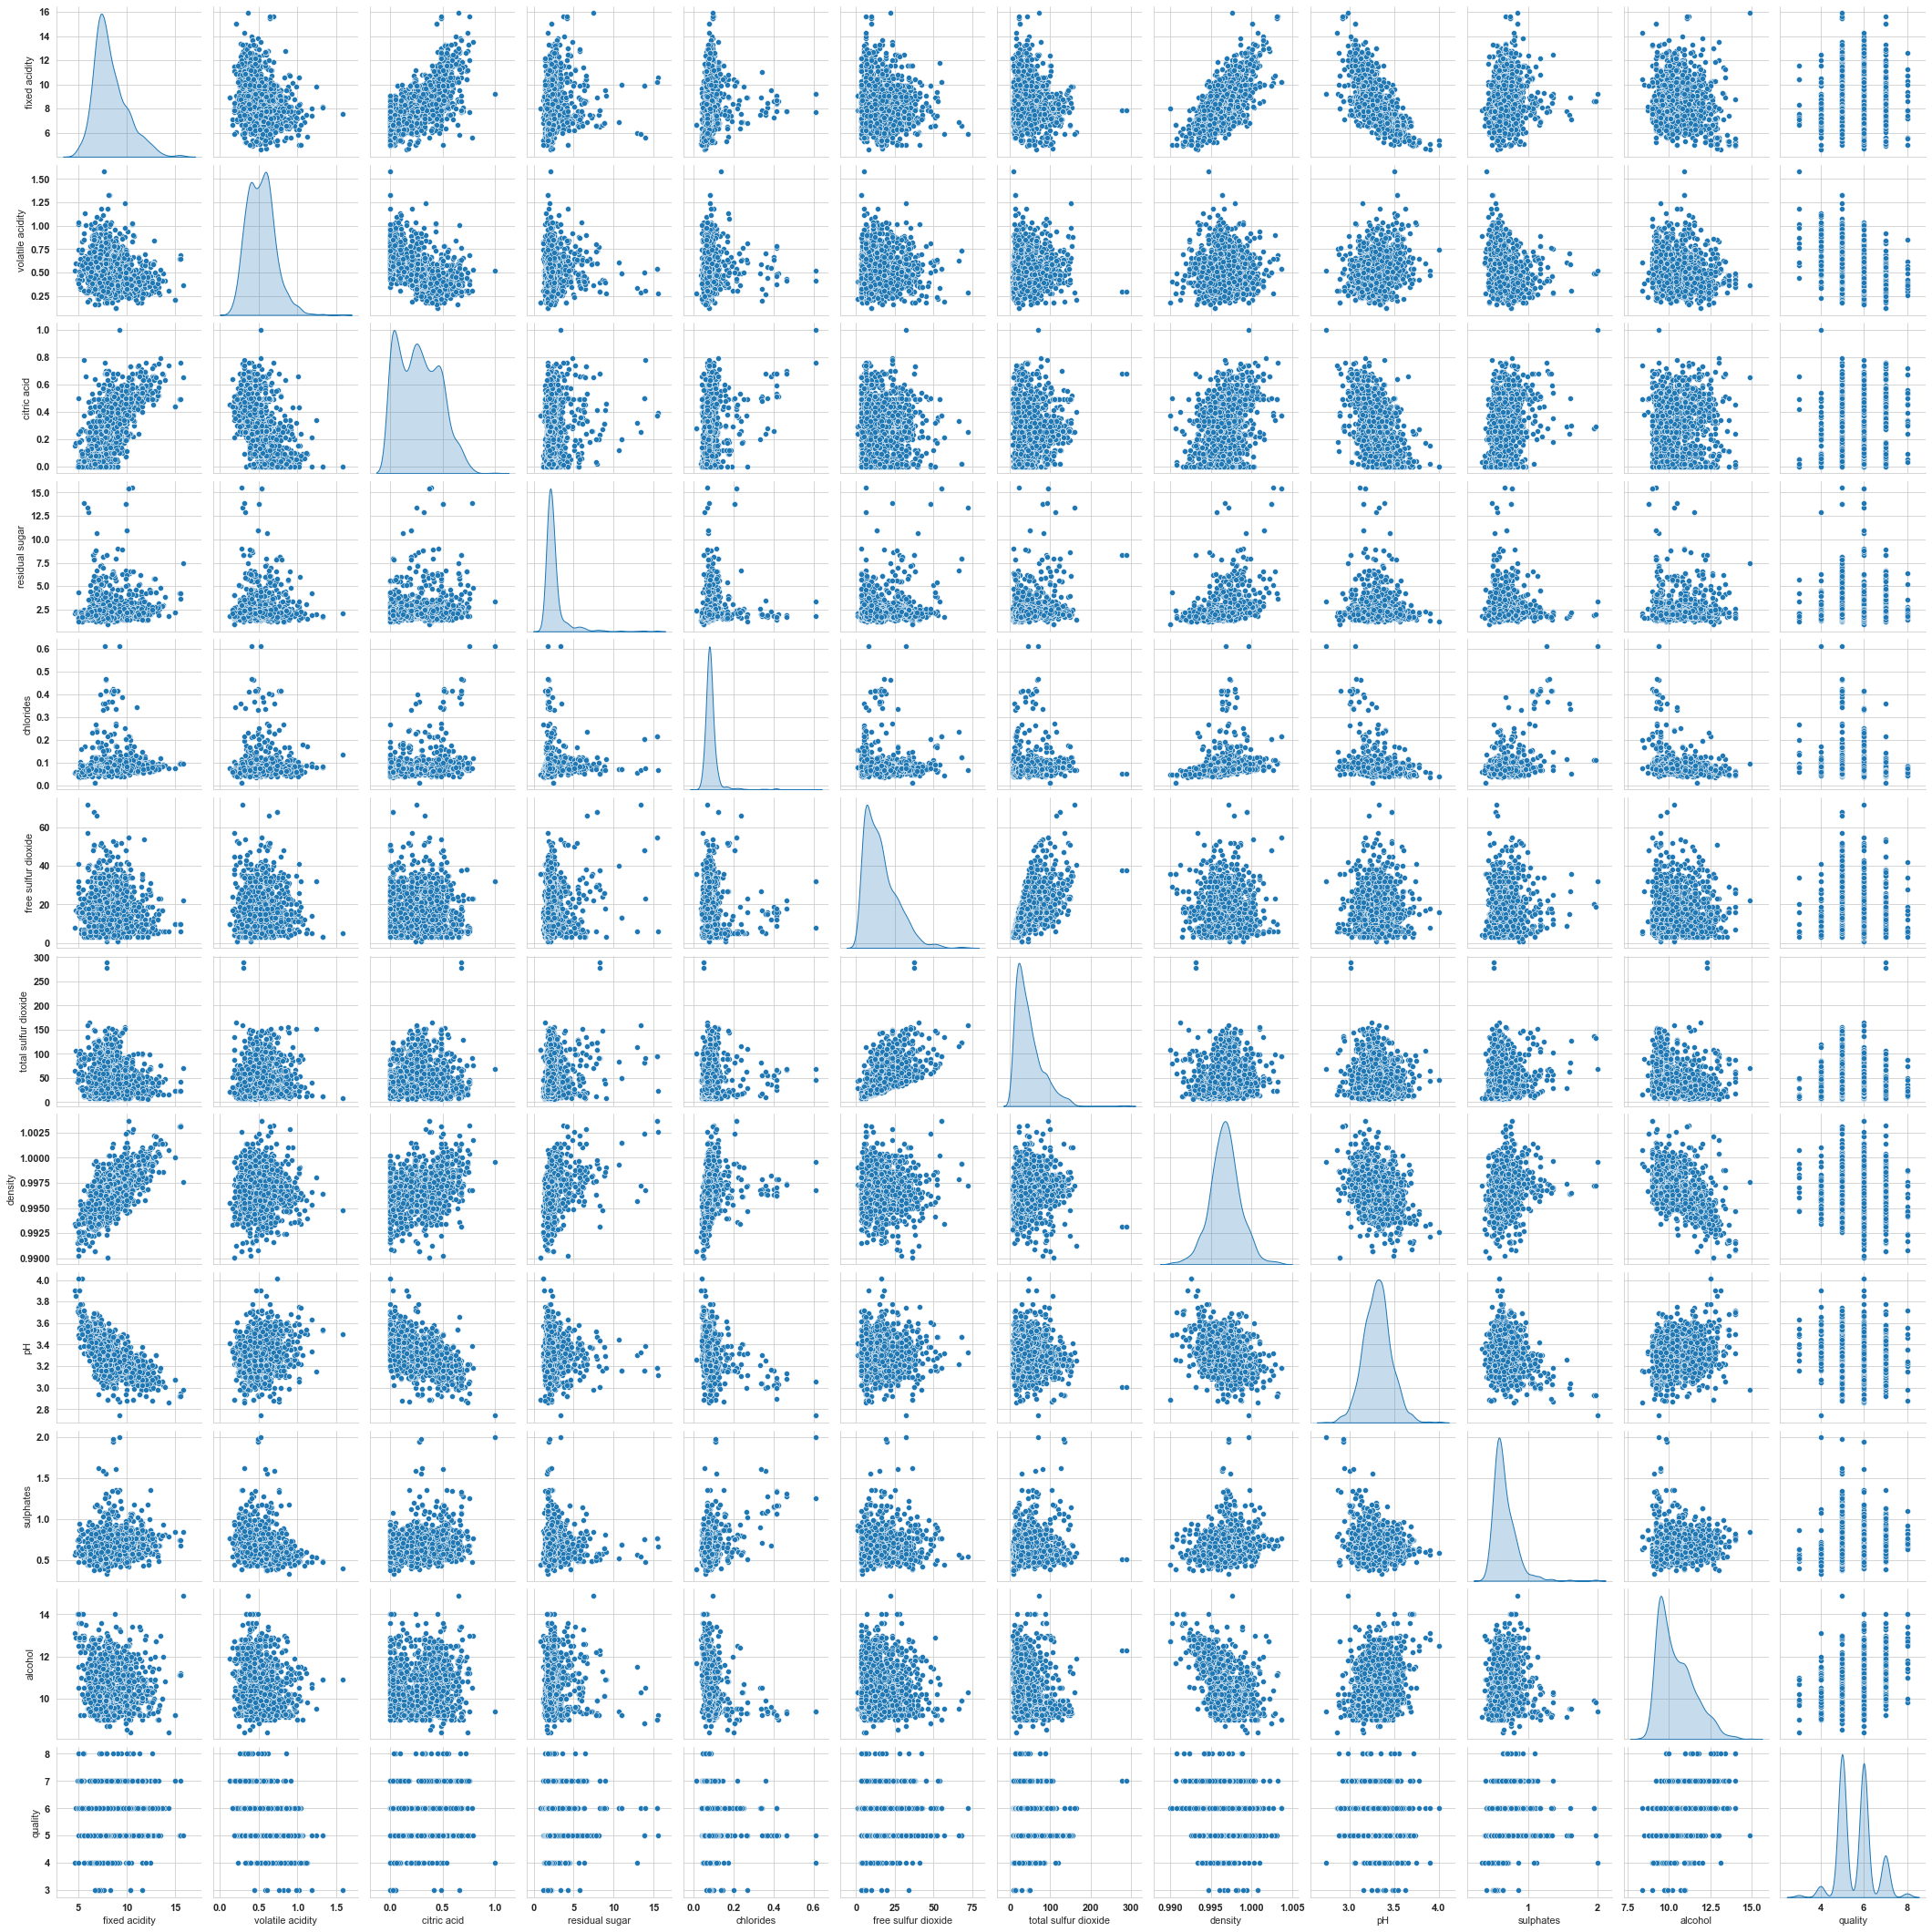

In [22]:
# To check the relationship among the numeric columns.
sns.pairplot(data=df, kind='scatter',diag_kind='kde')

#### Members of the team include:
* Oluwasegun Obi
* Peter Ogunremi
* Ogaga Ivhurie


#### Challenges
* Understanding other methods to use for review
* Machine learning attempt